In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
X_train = pd.read_csv('./Data/orange_small_train.data', sep='\t')
X_test = pd.read_csv('./Data/orange_small_test.data', sep='\t')
y_train_churn = pd.read_csv('./Data/orange_small_train_churn.labels.txt',header=None)
y_train_apt = pd.read_csv('./Data/orange_small_train_appetency.labels',header=None)
y_train_upsell = pd.read_csv('./Data/orange_small_train_upselling.labels',header=None)

In [3]:
y_train_apt.value_counts(normalize=True), y_train_churn.value_counts(normalize=True), y_train_upsell.value_counts(
    normalize=True)

(-1    0.9822
  1    0.0178
 dtype: float64,
 -1    0.92656
  1    0.07344
 dtype: float64,
 -1    0.92636
  1    0.07364
 dtype: float64)

In [4]:
# dropping any column with missing value

# collect minimum no of records to be present value for data
# using data with high percentage of missing records makes bad training set and will induce a high variance in the model predictions
missing_perc = 20
min_count = int(((100 - missing_perc) / 100) * X_train.shape[0] + 1)
min_count

40001

### Feature engineering

In [5]:
#drop all missing and only continous variable
prefered_uniques = 10
# create a list of numeric values and less than prefered uniques categorical columns
fe_unique_columns = list(X_train.select_dtypes(include='number').columns) + list(
    (X_train.select_dtypes(include='object').nunique() < prefered_uniques).index[
        X_train.select_dtypes(include='object').nunique() < prefered_uniques])
# collect only numeric features
X_train_all_missing_drop_continous = X_train.dropna( axis=1,thresh=min_count).dropna(axis=0).select_dtypes(include=['number'])#.agg(['nunique','count'])
numeric_col_after_drop = X_train_all_missing_drop_continous.columns
# create X_train with categorical variables with less than 10 uniques
X_train_all_missing_dropped_prefered_unique_cat = X_train[fe_unique_columns].dropna( axis=1,thresh=min_count).dropna(axis=0)
feature_prefered_columns = list(X_train_all_missing_dropped_prefered_unique_cat.columns)
# creating dummy variables for the data with  categorical variables
X_train_encoded = pd.get_dummies(X_train_all_missing_dropped_prefered_unique_cat,drop_first=True)
X_train_numeric = X_train_all_missing_drop_continous
del X_train_all_missing_drop_continous
# selecting X_test with the appropriate predictors for numeric predictors and selected unique threshold for category inclusion in predictors
X_test_numeric = X_test[numeric_col_after_drop]
X_test_encoded = pd.get_dummies(X_test[feature_prefered_columns],drop_first=True)[X_train_encoded.columns]


In [6]:
X_train_encoded.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var196_JA1C', 'Var196_mKeq', 'Var196_z3mO', 'Var203_F3hy',
       'Var203_HLqf', 'Var203_dgxZ', 'Var205_VpdQ', 'Var205_sJzTlal',
       'Var208_sBgB', 'Var210_7A3j', 'Var210_DM_V', 'Var210_g5HH',
       'Var210_uKAI', 'Var211_Mtgm', 'Var218_cJvF', 'Var221_JIiEFBU',
       'Var221_QKW8DRm', 'Var221_d0EEeJi', 'Var221_oslk', 'Var221_z4pH',
       'Var221_zCkv', 'Var223_M_8D', 'Var223_bCPvVye', 'Var223_jySVZNlOJy',
       'Var227_6fzt', 'Var227_RAYp', 'Var227_ZI9m', 'Var227_nIGXDli',
       'Var227_nIGjgSB', 'Var227_vJ_w8kB'],
      dtype='object')

In [7]:
features=np.array(X_train_encoded.columns[:38])

In [8]:
type(features)

numpy.ndarray

In [9]:
extra_features=['Var196','Var203','Var205','Var208','Var210','Var211','Var218','Var221','Var223','Var227']

In [10]:
#features.append(extra_features)
for i in range(len(extra_features)):
    features=np.append(features,extra_features[i])

In [11]:
features

array(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25',
       'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73',
       'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149',
       'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var196',
       'Var203', 'Var205', 'Var208', 'Var210', 'Var211', 'Var218',
       'Var221', 'Var223', 'Var227'], dtype=object)

In [12]:
X_train = pd.read_csv('./Data/orange_small_train.data', sep='\t')
X_test = pd.read_csv('./Data/orange_small_test.data', sep='\t')
y_train_churn = pd.read_csv('./Data/orange_small_train_churn.labels.txt',header=None)
y_train_apt = pd.read_csv('./Data/orange_small_train_appetency.labels',header=None)
y_train_upsell = pd.read_csv('./Data/orange_small_train_upselling.labels',header=None)

In [13]:
X_train=X_train[features]
X_test=X_test[features]

In [14]:
X_train.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var196', 'Var203', 'Var205', 'Var208', 'Var210', 'Var211',
       'Var218', 'Var221', 'Var223', 'Var227'],
      dtype='object')

In [15]:
X_train=pd.get_dummies(X_train,columns=extra_features)
X_test=pd.get_dummies(X_test,columns=extra_features)

In [16]:
X_train['churn']=y_train_churn
X_train['apt']=y_train_apt
X_train['upsell']=y_train_upsell

In [17]:
X_train.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var196_1K8T', 'Var196_JA1C', 'Var196_mKeq', 'Var196_z3mO',
       'Var203_9_Y1', 'Var203_F3hy', 'Var203_HLqf', 'Var203_dgxZ',
       'Var203_pybr', 'Var205_09_Q', 'Var205_VpdQ', 'Var205_sJzTlal',
       'Var208_kIsH', 'Var208_sBgB', 'Var210_3av_', 'Var210_7A3j',
       'Var210_DM_V', 'Var210_g5HH', 'Var210_oT7d', 'Var210_uKAI',
       'Var211_L84s', 'Var211_Mtgm', 'Var218_UYBR', 'Var218_cJvF',
       'Var221_Al6ZaUT', 'Var221_JIiEFBU', 'Var221_QKW8DRm', 'Var221_d0EEeJi',
       'Var221_oslk', 'Var221_z4pH', 'Var221_zCkv', 'Var223_LM8l689qOp',
       'Var223_M_8D', 'Var223_bCPvVye', 'Var223_jy

In [18]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [19]:
X_train.shape

(42153, 83)

In [20]:
X_train.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,churn,apt,upsell
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,0,0,1,0,0,0,0,-1,-1,-1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0,0,1,0,0,0,0,1,-1,-1
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,1,0,0,0,0,0,0,-1,-1,-1
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0,0,1,0,0,0,0,-1,-1,-1
5,658.0,7.0,3156.0,224.0,280.0,2.0,72.0,200.00,5.0,0.0,...,1,0,0,0,0,0,0,-1,-1,-1


In [21]:
xc_train,xc_test=train_test_split(X_train,train_size=0.9)

In [22]:
xc_train.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var196_1K8T', 'Var196_JA1C', 'Var196_mKeq', 'Var196_z3mO',
       'Var203_9_Y1', 'Var203_F3hy', 'Var203_HLqf', 'Var203_dgxZ',
       'Var203_pybr', 'Var205_09_Q', 'Var205_VpdQ', 'Var205_sJzTlal',
       'Var208_kIsH', 'Var208_sBgB', 'Var210_3av_', 'Var210_7A3j',
       'Var210_DM_V', 'Var210_g5HH', 'Var210_oT7d', 'Var210_uKAI',
       'Var211_L84s', 'Var211_Mtgm', 'Var218_UYBR', 'Var218_cJvF',
       'Var221_Al6ZaUT', 'Var221_JIiEFBU', 'Var221_QKW8DRm', 'Var221_d0EEeJi',
       'Var221_oslk', 'Var221_z4pH', 'Var221_zCkv', 'Var223_LM8l689qOp',
       'Var223_M_8D', 'Var223_bCPvVye', 'Var223_jy

In [23]:
xc_test.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,churn,apt,upsell
24192,1848.0,7.0,1260.0,416.0,520.0,16.0,216.0,220.08,0.0,210516.0,...,0,1,0,0,0,0,0,-1,-1,-1
21791,3836.0,28.0,7760.0,816.0,1020.0,8.0,192.0,169.68,0.0,240900.0,...,0,0,0,1,0,0,0,-1,-1,-1
15318,973.0,14.0,6052.0,136.0,170.0,2.0,16.0,220.08,0.0,4954734.0,...,0,0,1,0,0,0,0,-1,-1,-1
4828,532.0,0.0,0.0,136.0,170.0,0.0,0.0,220.08,0.0,3114666.0,...,0,0,0,0,1,0,0,-1,-1,1
35266,112.0,0.0,0.0,104.0,130.0,0.0,0.0,250.56,0.0,587202.0,...,0,0,1,0,0,0,0,1,-1,-1


In [24]:
max_depths=[5,10,15,20,25,30]

In [26]:
yc_train,yc_test=xc_train['churn'],xc_test['churn']
yu_train,yu_test=xc_train['upsell'],xc_test['upsell']
ya_train,ya_test=xc_train['apt'],xc_test['apt']

In [27]:
xc_train,xc_test=xc_train.drop(columns=['apt','churn','upsell']),xc_test.drop(columns=['apt','churn','upsell'])

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [33]:
accuracy_churn=[]

In [35]:
#for churn

for i in range(len(max_depths)):
    modelchurn=DecisionTreeClassifier(max_depth=max_depths[i])
    
    modelchurn.fit(xc_train,yc_train)
    
    preds=modelchurn.predict(xc_test)
    
    accuracy=accuracy_score(yc_test,preds)
    
    accuracy_churn.append(accuracy)

[]

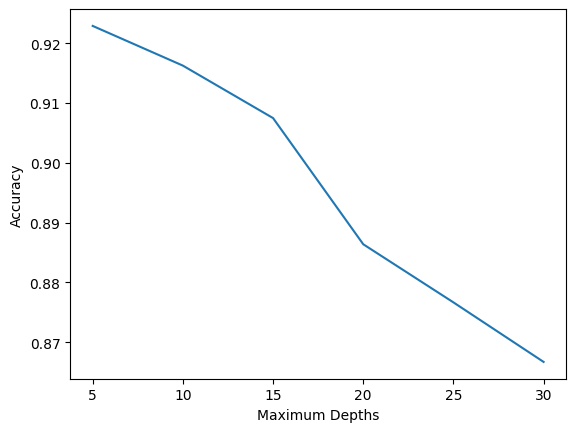

In [37]:
plt.plot(max_depths,accuracy_churn)

plt.xlabel('Maximum Depths')
plt.ylabel('Accuracy')

plt.plot()

In [38]:
accuracy_upsell=[]

In [40]:
#for upsell

for i in range(len(max_depths)):
    modelchurn=DecisionTreeClassifier(max_depth=max_depths[i])
    
    modelchurn.fit(xc_train,yu_train)
    
    preds=modelchurn.predict(xc_test)
    
    accuracy=accuracy_score(yu_test,preds)
    
    accuracy_upsell.append(accuracy)

[]

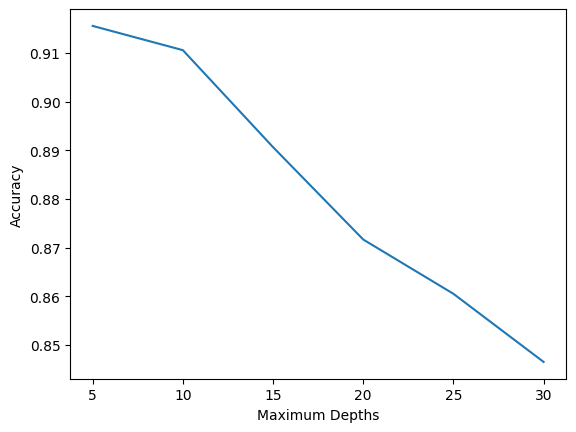

In [41]:
plt.plot(max_depths,accuracy_upsell)

plt.xlabel('Maximum Depths')
plt.ylabel('Accuracy')

plt.plot()

In [42]:
accuracy_apt=[]

In [44]:
#for apt

for i in range(len(max_depths)):
    modelchurn=DecisionTreeClassifier(max_depth=max_depths[i])
    
    modelchurn.fit(xc_train,ya_train)
    
    preds=modelchurn.predict(xc_test)
    
    accuracy=accuracy_score(ya_test,preds)
    
    accuracy_apt.append(accuracy)

[]

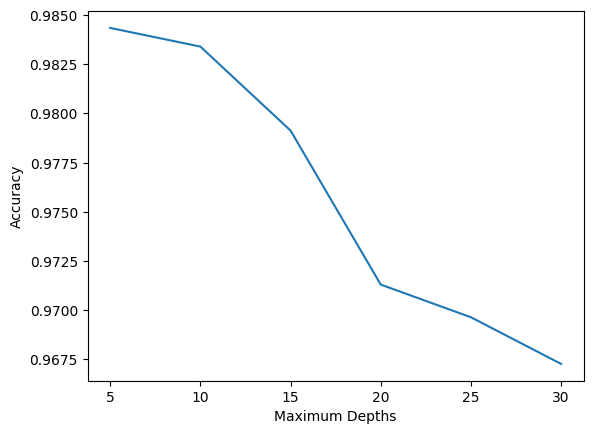

In [46]:
plt.plot(max_depths,accuracy_apt)

plt.xlabel('Maximum Depths')
plt.ylabel('Accuracy')

plt.plot()

In [47]:
#Therefore max_depth=5 seems suitable

In [48]:
model_churn=DecisionTreeClassifier(max_depth=5)
model_apt=DecisionTreeClassifier(max_depth=5)
model_upsell=DecisionTreeClassifier(max_depth=5)

model_churn.fit(xc_train,yc_train)
model_apt.fit(xc_train,ya_train)
model_upsell.fit(xc_train,yu_train)

DecisionTreeClassifier(max_depth=5)

In [49]:
model_churn.feature_importances_

array([0.01765469, 0.        , 0.20698696, 0.        , 0.        ,
       0.        , 0.        , 0.01941337, 0.        , 0.        ,
       0.        , 0.        , 0.00749139, 0.05907929, 0.00625282,
       0.01759149, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13141547, 0.02196302, 0.        ,
       0.        , 0.        , 0.        , 0.00873278, 0.02864451,
       0.        , 0.        , 0.03154154, 0.        , 0.01559011,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.13064787,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03510297, 0.        , 0.03373739, 0.00643362, 0.        ,
       0.12297843, 0.08204916, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01669313, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

[]

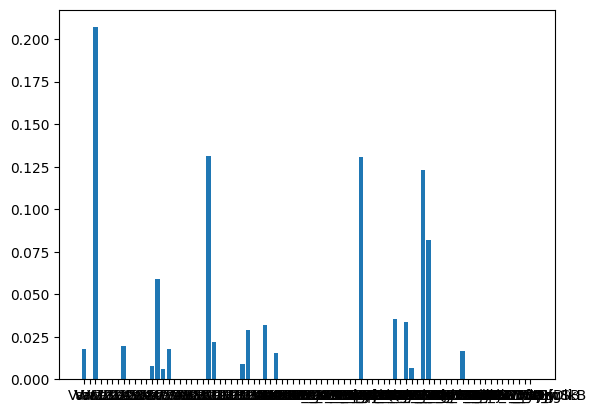

In [50]:
plt.bar(xc_train.columns,model_churn.feature_importances_)

plt.plot()

In [64]:
importances=model_churn.feature_importances_
indicesc=[]

for i in range(len(importances)):
    if(importances[i]>0.01):
        indicesc.append(i)

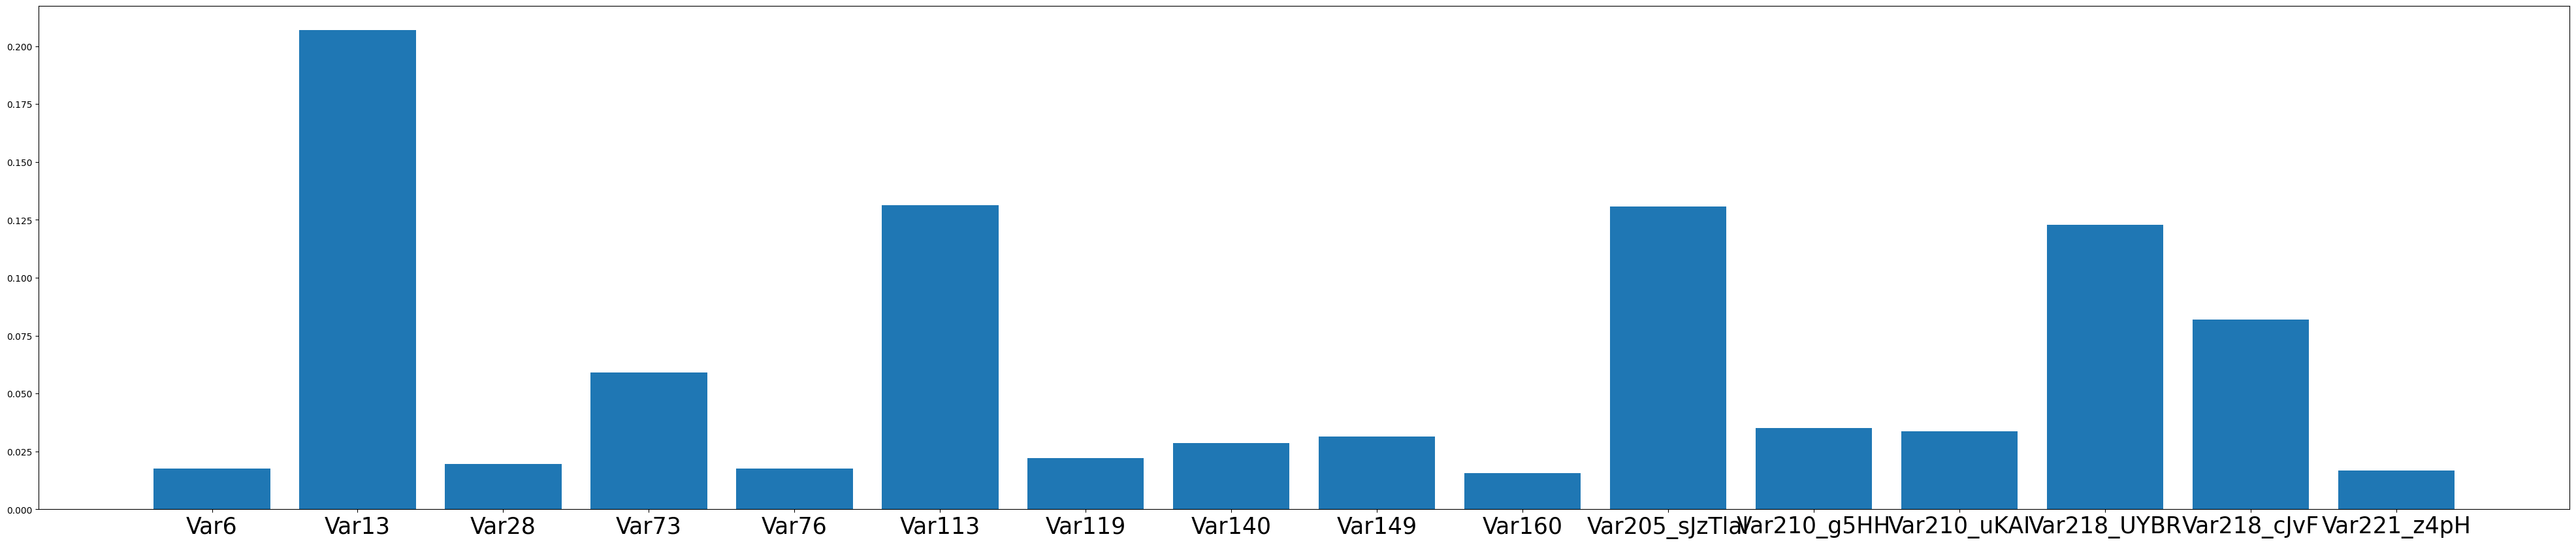

In [73]:
plt.figure(figsize=(50,10))

plt.bar(xc_train.columns[indicesc],importances[indicesc])
plt.xticks(fontsize=25)

plt.show()

In [74]:
predictions=model_churn.predict(xc_test)

C:\Users\chinm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[]

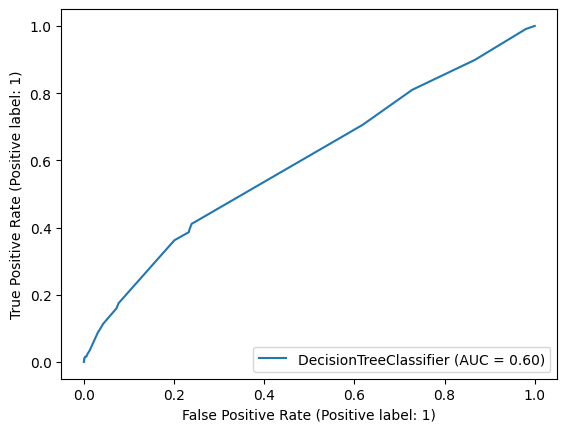

In [79]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_churn,xc_test,yc_test)

plt.plot()

<AxesSubplot: >

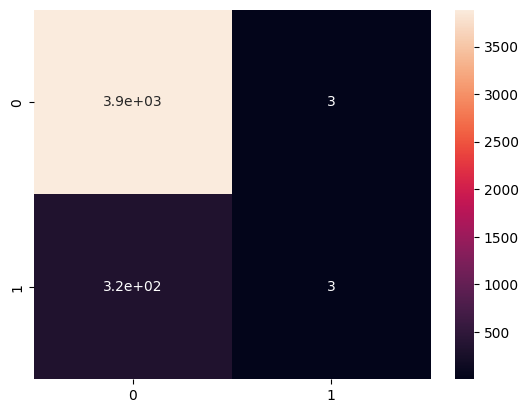

In [81]:
from sklearn.metrics import confusion_matrix

confusionmatrix=confusion_matrix(yc_test,predictions)

import seaborn as sns

sns.heatmap(confusionmatrix,annot=True)

[]

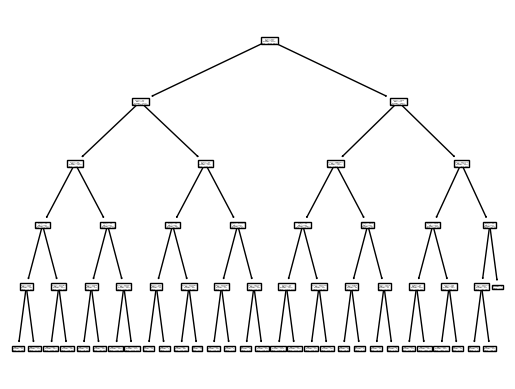

In [85]:
from sklearn.tree import plot_tree

plot_tree(model_churn)

plt.plot()

[]

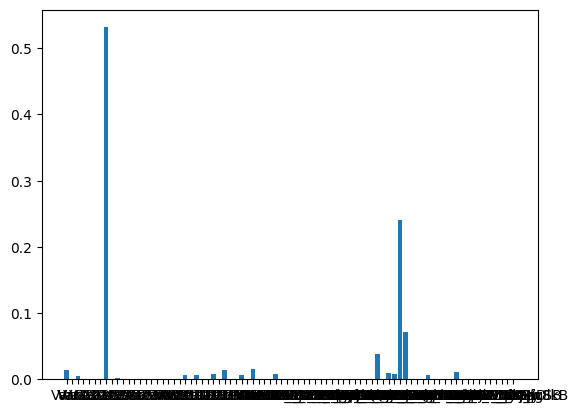

In [51]:
plt.bar(xc_train.columns,model_upsell.feature_importances_)

plt.plot()

[]

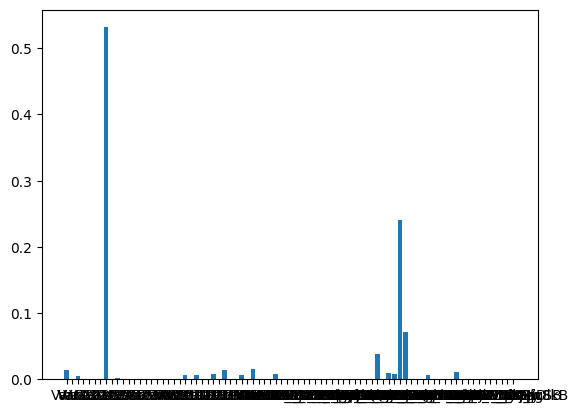

In [52]:
plt.bar(xc_train.columns,model_upsell.feature_importances_)

plt.plot()

In [53]:
X_test = pd.read_csv('./Data/orange_small_test.data', sep='\t')

In [54]:
X_test=X_test[features]

In [55]:
X_test.dropna(inplace=True)

In [56]:
X_test=pd.get_dummies(X_test,columns=extra_features)

In [57]:
X_test.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var223_M_8D,Var223_bCPvVye,Var223_jySVZNlOJy,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB
0,1225.0,7.0,100.0,156.0,195.0,0.0,72.0,166.56,0.0,4259232.0,...,0,0,0,0,0,0,1,0,0,0
1,259.0,0.0,0.0,192.0,240.0,0.0,40.0,300.32,5.0,4859550.0,...,0,0,0,0,0,1,0,0,0,0
2,861.0,14.0,236.0,32.0,40.0,0.0,8.0,186.64,0.0,10038840.0,...,0,0,0,0,0,1,0,0,0,0
3,1568.0,7.0,1232.0,448.0,560.0,4.0,88.0,166.56,0.0,116760.0,...,0,0,0,0,0,1,0,0,0,0
4,1197.0,7.0,204.0,100.0,125.0,8.0,40.0,133.12,0.0,257772.0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
PREDICTIONS_CHURN=model_churn.predict(X_test)
PREDICTIONS_UPSELL=model_upsell.predict(X_test)
PREDICTIONS_APT=model_apt.predict(X_test)

C:\Users\chinm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Var210_eyPI
Feature names seen at fit time, yet now missing:
- Var203_pybr
- Var210_oT7d

  warnings.warn(message, FutureWarning)


ValueError: X has 79 features, but DecisionTreeClassifier is expecting 80 features as input.

In [59]:
csdv=np.zeros(shape=len(X_test))

In [60]:
X_test['Var203_pybr']=csdv
X_test['Var210_oT7d']=csdv

In [61]:
X_test=X_test.drop(columns=['Var210_eyPI'])

In [62]:
X_test.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var223_jySVZNlOJy,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var203_pybr,Var210_oT7d
0,1225.0,7.0,100.0,156.0,195.0,0.0,72.0,166.56,0.0,4259232.0,...,0,0,0,0,1,0,0,0,0.0,0.0
1,259.0,0.0,0.0,192.0,240.0,0.0,40.0,300.32,5.0,4859550.0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,861.0,14.0,236.0,32.0,40.0,0.0,8.0,186.64,0.0,10038840.0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,1568.0,7.0,1232.0,448.0,560.0,4.0,88.0,166.56,0.0,116760.0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,1197.0,7.0,204.0,100.0,125.0,8.0,40.0,133.12,0.0,257772.0,...,0,0,0,0,1,0,0,0,0.0,0.0


In [63]:
PREDICTIONS_CHURN=model_churn.predict(X_test)
PREDICTIONS_UPSELL=model_upsell.predict(X_test)
PREDICTIONS_APT=model_apt.predict(X_test)

C:\Users\chinm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\chinm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\chinm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
